In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()



['measurement', 'station']

In [7]:
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


In [13]:
# Calculate the date one year from the last date in data set.
yr_prior_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Year before Date: ", yr_prior_date)

Year before Date:  2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores


In [15]:
data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
data

[('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9),
 ('2016-08-29', 22.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.5),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 1.3),

In [16]:
df = pd.DataFrame(data)
df

,date,prcp
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
3,2016-08-24,NaN
4,2016-08-24,31.0
...,...,...
2218,2017-08-22,12.7
2219,2017-08-23,0.0
2220,2017-08-23,0.0
2221,2017-08-23,2.0


In [17]:
group_df = df.groupby(["date"]).sum()
group_df.head()

,prcp
date,
2016-08-24,236.9
2016-08-25,13.6
2016-08-26,2.6
2016-08-27,8.1
2016-08-28,78.9


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column


In [19]:
x_axis = group_df.index

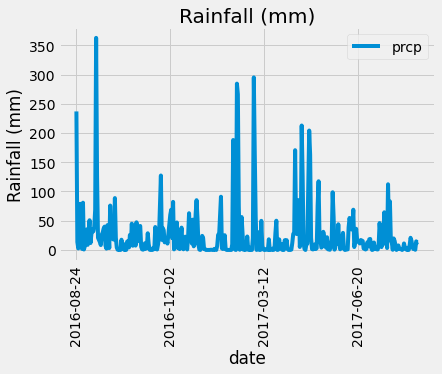

In [20]:
group_df.plot(rot=90)
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall (mm)')
plt.show()

In [21]:
# Sort the dataframe by date


In [22]:
# Use Pandas Plotting with Matplotlib to plot the data

In [23]:
df

,date,prcp
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
3,2016-08-24,NaN
4,2016-08-24,31.0
...,...,...
2218,2017-08-22,12.7
2219,2017-08-23,0.0
2220,2017-08-23,0.0
2221,2017-08-23,2.0


In [24]:
prcp = df["prcp"]

In [25]:
prcp.describe()

count    2015.000000
mean        4.485112
std        11.690532
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: prcp, dtype: float64

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [27]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).distinct().count()

9

In [29]:
sel = [measurement.station, 
      func.count(measurement.station)]
count = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
sel = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]
active_station = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
active_station

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [31]:
sel = [measurement.station, 
       func.min(measurement.tobs)]
min_tobs = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
print(f"Minimum temp: {min_tobs}")

Minimum temp: [('USC00519281', 12.2)]


In [32]:
sel = [measurement.station, 
       func.max(measurement.tobs)]
max_tobs = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
print(f"Maximum temp: {max_tobs}")

Maximum temp: [('USC00519281', 29.4)]


In [33]:
sel = [measurement.station, 
       func.avg(measurement.tobs)]
avg_tobs = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
print(f"Average temp: {avg_tobs}")

Average temp: [('USC00519281', 22.03582251082252)]


In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
tobs_data

[('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-05', 26.1),
 ('2016-10-

In [37]:
tobs_df = pd.DataFrame(tobs_data)

In [38]:
tobs_df

,date,tobs
0,2016-08-24,25.0
1,2016-08-25,26.7
2,2016-08-26,26.7
3,2016-08-27,23.9
4,2016-08-28,22.8
...,...,...
346,2017-08-14,25.0
347,2017-08-15,25.0
348,2017-08-16,24.4
349,2017-08-17,24.4


In [39]:
tobs_df.describe()

,tobs
count,351.000000
mean,22.829345
std,2.631060
min,15.000000
25%,21.100000
50%,23.300000
75%,25.000000
max,28.300000


Text(0.5, 0, 'Temperature')

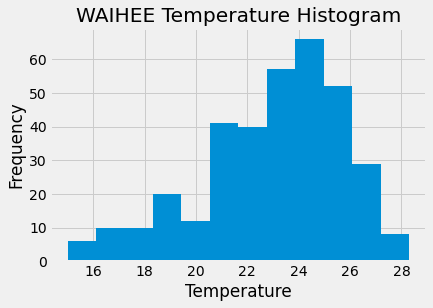

In [42]:
plt.hist(tobs_df["tobs"], bins=12)
plt.title("WAIHEE Temperature Histogram")
plt.ylabel("Frequency")
plt.xlabel("Temperature")

# Close session

In [43]:
# Close Session
session.close()